In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from os import listdir
from os.path import isfile, join
import os

In [2]:
os.path.abspath('..')

'C:\\Users\\ankaa'

In [4]:
# Set paths
p = os.path.abspath('..')
p1 = p + '\\Downloads\\raw data 17-19\\'
p2 = p + '\\Downloads\\engineered features 17-19\\'

# Get all file names.csv
onlyfiles = [f for f in listdir(p1) if isfile(join(p1, f))]

In [5]:
onlyfiles

['README.txt',
 'SH600000.csv',
 'SH600010.csv',
 'SH600015.csv',
 'SH600016.csv',
 'SH600018.csv',
 'SH600028.csv',
 'SH600030.csv',
 'SH600036.csv',
 'SH600048.csv',
 'SH600050.csv',
 'SH600089.csv',
 'SH600104.csv',
 'SH600109.csv',
 'SH600111.csv',
 'SH600150.csv',
 'SH600256.csv',
 'SH600406.csv',
 'SH600518.csv',
 'SH600519.csv',
 'SH600583.csv',
 'SH600585.csv',
 'SH600637.csv',
 'SH600690.csv',
 'SH600837.csv',
 'SH600887.csv',
 'SH600893.csv',
 'SH600958.csv',
 'SH600999.csv',
 'SH601006.csv',
 'SH601088.csv',
 'SH601166.csv',
 'SH601169.csv',
 'SH601186.csv',
 'SH601288.csv',
 'SH601318.csv',
 'SH601328.csv',
 'SH601390.csv',
 'SH601398.csv',
 'SH601601.csv',
 'SH601628.csv',
 'SH601668.csv',
 'SH601688.csv',
 'SH601766.csv',
 'SH601800.csv',
 'SH601818.csv',
 'SH601857.csv',
 'SH601901.csv',
 'SH601988.csv',
 'SH601989.csv',
 'SH601998.csv']

In [8]:
raw_df=[]
tech_df=[]
for f, stock_num in zip(onlyfiles[27:39], range(12)):
    
    #Read File
    raw = pd.read_csv(p1+f)
    tech = pd.read_csv(p2+f)
    tech = tech.drop('Unnamed: 0', axis=1)
    raw_df.append(raw)
    tech_df.append(tech)

In [7]:
onlyfiles[27:39]

['SH600958.csv',
 'SH600999.csv',
 'SH601006.csv',
 'SH601088.csv',
 'SH601166.csv',
 'SH601169.csv',
 'SH601186.csv',
 'SH601288.csv',
 'SH601318.csv',
 'SH601328.csv',
 'SH601390.csv',
 'SH601398.csv']

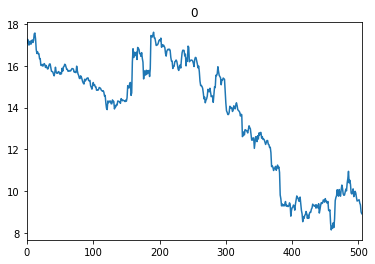

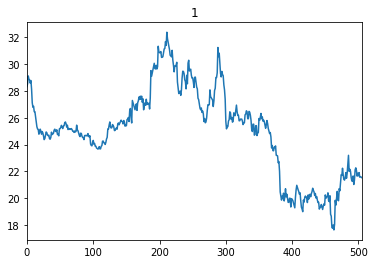

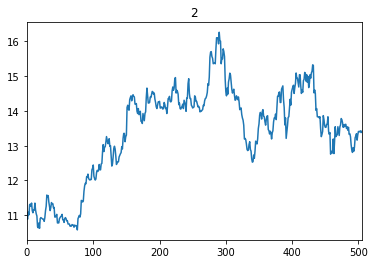

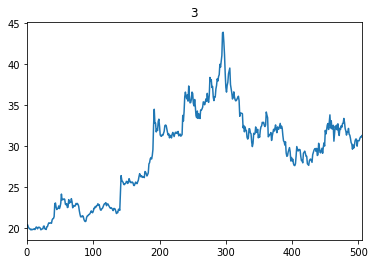

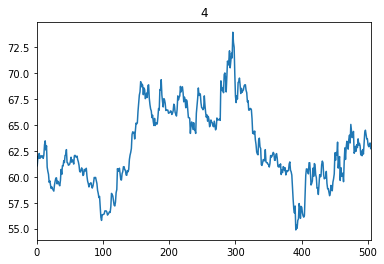

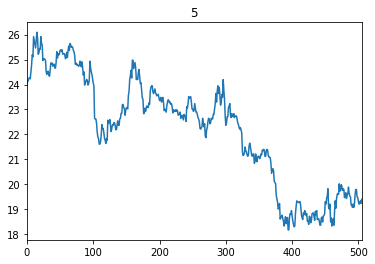

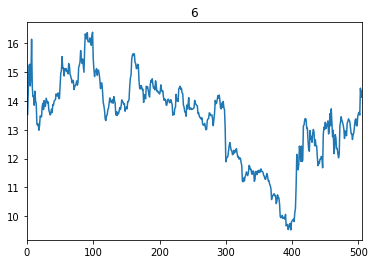

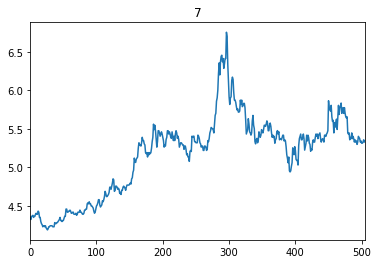

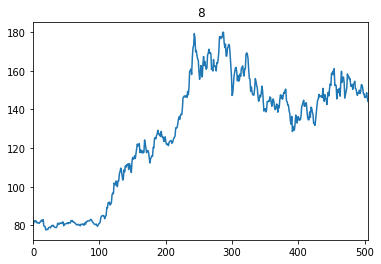

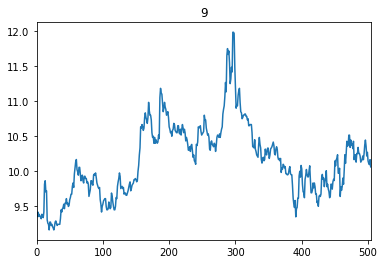

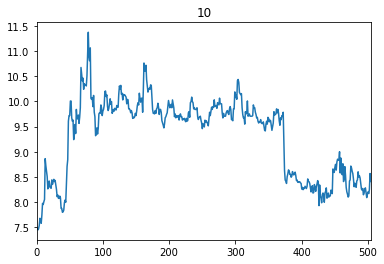

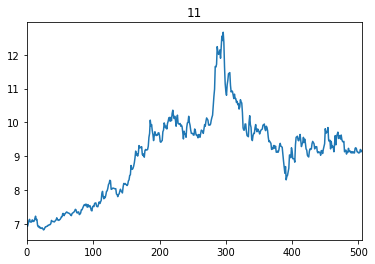

In [9]:
for i in range(12):
    raw_df[i].loc[:505,'Close'].plot()
    plt.title(i)
#     raw_df[i]['Close'].plot()
    plt.show()

In [12]:
close_dic = {}
for i in range(12):
    temp=raw_df[i].loc[:504,'Close']
    close_dic['stock_{}'.format(i+27)] = temp
close_df= pd.DataFrame.from_dict(close_dic)

In [13]:
close_df

,stock_27,stock_28,stock_29,stock_30,stock_31,stock_32,stock_33,stock_34,stock_35,stock_36,stock_37,stock_38
0,17.0900,28.3180,10.9310,20.2864,61.1446,24.0037,13.5806,4.3495,80.5845,9.3502,7.5020,6.9460
1,17.2755,28.5427,10.8847,20.3659,61.0345,24.1295,13.5229,4.3224,81.5700,9.3502,7.4691,6.9304
2,17.1725,29.1117,11.0854,20.0875,61.9882,24.1547,14.3998,4.3631,82.3763,9.4140,7.4472,7.0240
3,16.9972,28.8572,11.0082,19.9814,61.7681,24.2553,15.1960,4.3631,81.9955,9.3502,7.4691,7.1021
4,17.0591,28.8272,11.3015,19.8621,62.2449,24.2553,15.2652,4.3766,82.3539,9.3821,7.5349,7.1333
...,...,...,...,...,...,...,...,...,...,...,...,...
500,9.5633,21.6716,13.4118,30.6316,63.0534,19.3088,13.5540,5.3135,146.2093,10.1444,8.2024,9.0968
501,9.5845,21.9047,13.3950,30.6316,62.8945,19.2114,13.6018,5.3135,146.1858,10.1093,8.1682,9.0968
502,9.4250,21.5629,13.4118,30.8885,63.1328,19.2439,13.5063,5.3285,146.8677,10.0918,8.2479,9.1138
503,9.3399,21.5940,13.4286,31.0811,63.2519,19.3412,14.4369,5.3583,148.6077,10.1619,8.5669,9.1992


In [14]:
df_temp=(close_df.iloc[1:,:].to_numpy()-close_df.iloc[:-1,:].to_numpy())/close_df.iloc[:-1,:].to_numpy()

In [15]:
Return_df=pd.DataFrame(data=df_temp,index=range(1,505),columns=close_df.columns)

In [16]:
Return_df

,stock_27,stock_28,stock_29,stock_30,stock_31,stock_32,stock_33,stock_34,stock_35,stock_36,stock_37,stock_38
1,0.010854,0.007935,-0.004236,0.003919,-0.001801,0.005241,-0.004249,-0.006231,0.012229,0.000000,-0.004385,-0.002246
2,-0.005962,0.019935,0.018439,-0.013670,0.015626,0.001044,0.064846,0.009416,0.009885,0.006823,-0.002932,0.013506
3,-0.010208,-0.008742,-0.006964,-0.005282,-0.003551,0.004165,0.055292,0.000000,-0.004623,-0.006777,0.002941,0.011119
4,0.003642,-0.001040,0.026644,-0.005971,0.007719,0.000000,0.004554,0.003094,0.004371,0.003412,0.008810,0.004393
5,0.007855,-0.008832,0.001371,0.000000,-0.007660,-0.001035,-0.049131,-0.006192,-0.011967,-0.003400,0.018925,-0.010949
...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.002232,-0.008532,0.007580,0.000000,-0.009358,-0.008335,0.006199,-0.005596,-0.013016,-0.011941,0.004187,-0.003735
501,0.002217,0.010756,-0.001253,0.000000,-0.002520,-0.005044,0.003527,0.000000,-0.000161,-0.003460,-0.004170,0.000000
502,-0.016641,-0.015604,0.001254,0.008387,0.003789,0.001692,-0.007021,0.002823,0.004665,-0.001731,0.009757,0.001869
503,-0.009029,0.001442,0.001253,0.006235,0.001886,0.005056,0.068901,0.005593,0.011847,0.006946,0.038677,0.009370


In [17]:
Return_df.describe()

,stock_27,stock_28,stock_29,stock_30,stock_31,stock_32,stock_33,stock_34,stock_35,stock_36,stock_37,stock_38
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,-0.001107,-0.000396,0.000487,0.001037,0.000111,-0.000385,0.000281,0.000478,0.001341,0.000197,0.000362,0.000634
std,0.018156,0.017000,0.013131,0.019725,0.011135,0.010380,0.020303,0.012297,0.018266,0.010303,0.016527,0.013496
min,-0.099330,-0.070152,-0.051591,-0.069959,-0.040279,-0.054623,-0.100145,-0.053080,-0.066096,-0.042697,-0.090366,-0.058132
25%,-0.008739,-0.009244,-0.006744,-0.009016,-0.006093,-0.005791,-0.008664,-0.005714,-0.008642,-0.005069,-0.006939,-0.006189
50%,-0.001137,-0.000874,0.000000,0.000664,-0.000572,0.000000,0.000000,0.000000,0.000974,0.000000,0.000000,0.000000
75%,0.006899,0.007680,0.006827,0.009385,0.005401,0.005011,0.007930,0.005605,0.010587,0.004991,0.006763,0.007199
max,0.100615,0.099915,0.059804,0.100057,0.058207,0.036992,0.100539,0.070851,0.057170,0.055824,0.100697,0.061004


In [18]:
Return_df.std()

stock_27    0.018156
stock_28    0.017000
stock_29    0.013131
stock_30    0.019725
stock_31    0.011135
stock_32    0.010380
stock_33    0.020303
stock_34    0.012297
stock_35    0.018266
stock_36    0.010303
stock_37    0.016527
stock_38    0.013496
dtype: float64

In [21]:
Return_df.corr()

,stock_27,stock_28,stock_29,stock_30,stock_31,stock_32,stock_33,stock_34,stock_35,stock_36,stock_37,stock_38
stock_27,1.000000,0.732636,0.341258,0.230061,0.362729,0.451231,0.346579,0.275659,0.346693,0.364463,0.075106,0.221928
stock_28,0.732636,1.000000,0.427785,0.314406,0.481907,0.506383,0.420280,0.395414,0.410283,0.468543,0.081807,0.346364
stock_29,0.341258,0.427785,1.000000,0.293748,0.462182,0.311051,0.358988,0.382531,0.372804,0.408391,0.025563,0.394481
stock_30,0.230061,0.314406,0.293748,1.000000,0.376277,0.265181,0.250749,0.367936,0.294772,0.287222,0.096381,0.367513
stock_31,0.362729,0.481907,0.462182,0.376277,1.000000,0.604092,0.396922,0.718759,0.566937,0.767591,0.078140,0.705766
stock_32,0.451231,0.506383,0.311051,0.265181,0.604092,1.000000,0.351883,0.527230,0.441660,0.586647,0.110358,0.497165
stock_33,0.346579,0.420280,0.358988,0.250749,0.396922,0.351883,1.000000,0.289715,0.321553,0.316315,0.151530,0.279410
stock_34,0.275659,0.395414,0.382531,0.367936,0.718759,0.527230,0.289715,1.000000,0.463027,0.769562,0.093357,0.852144
stock_35,0.346693,0.410283,0.372804,0.294772,0.566937,0.441660,0.321553,0.463027,1.000000,0.459289,0.080318,0.508005
stock_36,0.364463,0.468543,0.408391,0.287222,0.767591,0.586647,0.316315,0.769562,0.459289,1.000000,0.086689,0.731827


## To select the ones with higher std. Here  I choose std>0.017 

In [24]:
Select_1 = Return_df.loc[:,Return_df.std()>=0.015]

In [25]:
# Stock 37 seems to be the right choice.
corrMatrix = Select_1.corr()
corrMatrix

,stock_27,stock_28,stock_30,stock_33,stock_35,stock_37
stock_27,1.000000,0.732636,0.230061,0.346579,0.346693,0.075106
stock_28,0.732636,1.000000,0.314406,0.420280,0.410283,0.081807
stock_30,0.230061,0.314406,1.000000,0.250749,0.294772,0.096381
stock_33,0.346579,0.420280,0.250749,1.000000,0.321553,0.151530
stock_35,0.346693,0.410283,0.294772,0.321553,1.000000,0.080318
stock_37,0.075106,0.081807,0.096381,0.151530,0.080318,1.000000


## Since only stock_13 has negative corr with others, so I will choose stock_13 and those have negative corr with 13 (stock 2/3/5/9)\
## Then, I will campare corr among 2/3/5/9, and choose 5/9/13 as final stocks

In [29]:
Return_df.corr()['stock_37'].sort_values()

stock_29    0.025563
stock_38    0.070624
stock_27    0.075106
stock_31    0.078140
stock_35    0.080318
stock_28    0.081807
stock_36    0.086689
stock_34    0.093357
stock_30    0.096381
stock_32    0.110358
stock_33    0.151530
stock_37    1.000000
Name: stock_37, dtype: float64

In [30]:
Return_df.corr()['stock_29'].sort_values()

stock_37    0.025563
stock_30    0.293748
stock_32    0.311051
stock_27    0.341258
stock_33    0.358988
stock_35    0.372804
stock_34    0.382531
stock_38    0.394481
stock_36    0.408391
stock_28    0.427785
stock_31    0.462182
stock_29    1.000000
Name: stock_29, dtype: float64

In [53]:
corrMatrix['stock_3'].sort_values()

stock_13   -0.019922
stock_8     0.218285
stock_9     0.245884
stock_12    0.263525
stock_11    0.286825
stock_7     0.332924
stock_6     0.344043
stock_1     0.358703
stock_10    0.371253
stock_4     0.373664
stock_5     0.401517
stock_2     0.433429
stock_3     1.000000
Name: stock_3, dtype: float64

In [54]:
corrMatrix['stock_5'].sort_values()

stock_13   -0.021055
stock_11    0.153446
stock_8     0.192167
stock_12    0.220576
stock_9     0.294007
stock_4     0.348468
stock_2     0.358876
stock_7     0.398410
stock_3     0.401517
stock_10    0.417782
stock_6     0.630456
stock_1     0.657153
stock_5     1.000000
Name: stock_5, dtype: float64